In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [28]:
df_raw = pd.read_csv(
    'data/streamflow_prediction_dataset_averaged_cols.csv', 
    index_col=0
)

array([[ 1.88355202,  3.19611183,  0.41523851, ..., -1.00593522,
        -0.06122173, -0.0875999 ],
       [ 1.94341795,  3.29349048,  0.46018298, ..., -0.99607501,
        -0.03431881, -0.08756559],
       [ 1.9533956 ,  3.34217981,  0.47244056, ..., -0.99607501,
        -0.0035726 , -0.08759132],
       ...,
       [-0.97005713, -0.68280441,  0.30492028, ..., -0.71998923,
        -0.73379489, -0.09053326],
       [-0.97005713, -0.68280441,  0.30492028, ..., -0.73970965,
        -0.72995161, -0.09067907],
       [-0.97005713, -0.68280441,  0.30492028, ..., -0.78901068,
        -0.76454109, -0.09080772]])

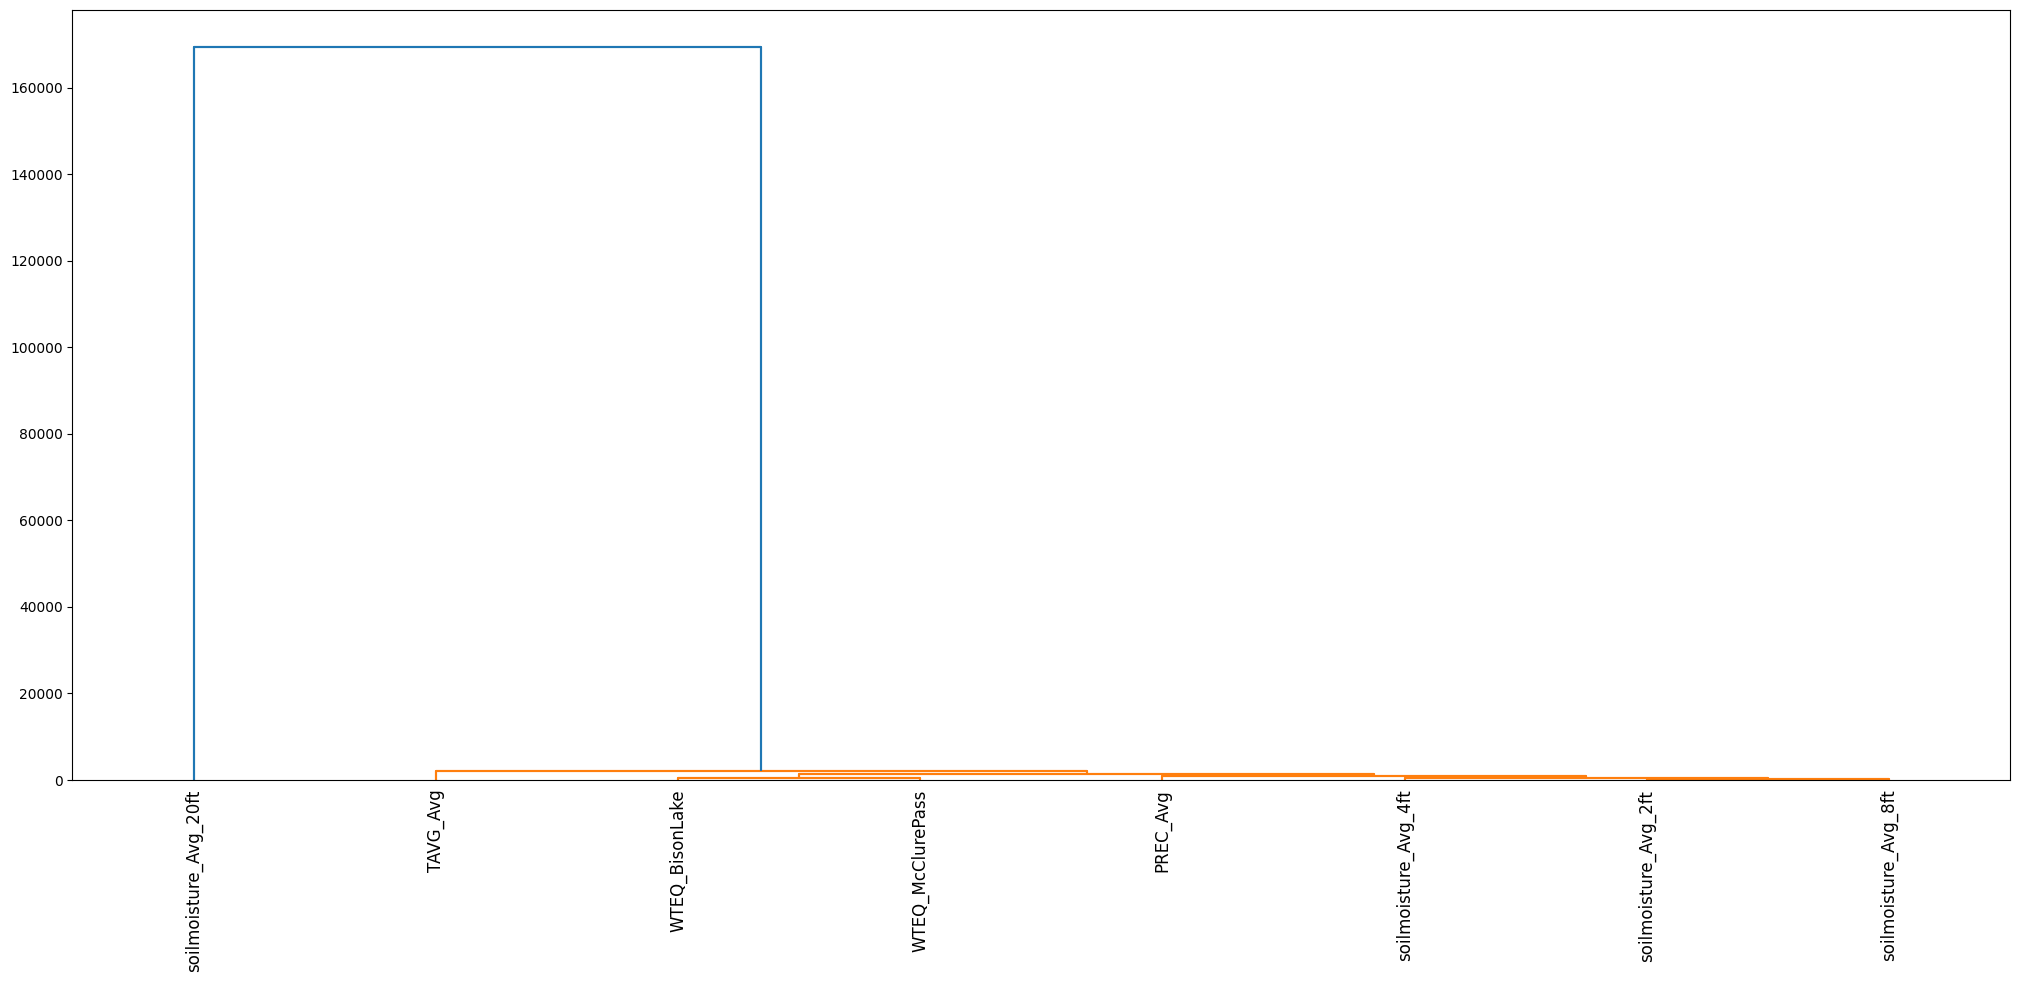

In [29]:
# generate dendrogram
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw)
display(df_scaled)

Z = linkage(df.T, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
dn = dendrogram(Z, labels=df.columns, leaf_rotation=90)
plt.show()

### Dendrogram Results - First Look
The dendrogram results indicate two overarching clusters. The first cluster remains entirely composed of the soil moisture metric at a 20ft depth, while the second cluster composes of average temperature, snow water equivalent, precipitation, and soil moisture from 2-8ft. This seems to indicate that soil moisture at 20ft does not immediately relate to the other metrics. Intuitively, this makes sense; immediate precipitation will take time to soak into the soil and may not immediately be correlated to the day-by-day weather.

We'll perform an experiment to test this hypothesis - if there is a lag implemented on the soil moisture - 20ft data, will this better correlate to the dataset?

,WTEQ_BisonLake,WTEQ_McClurePass,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_avg_20ft_lagged
date,,,,,,,,
2008-03-22,29.4,25.1,26.75,17.75,17.500,10.8,18.04,20.62
2008-03-23,29.4,25.1,26.75,20.65,17.525,10.7,18.26,20.70
2008-03-24,29.5,25.1,26.75,30.55,18.225,10.9,18.24,20.64
2008-03-25,29.5,25.2,26.75,33.80,18.975,11.0,18.28,20.66
2008-03-26,29.6,25.3,26.75,36.50,19.625,11.0,18.76,20.64
...,...,...,...,...,...,...,...,...
2021-07-23,0.0,0.0,24.20,57.50,21.250,13.8,14.60,15.62
2021-07-24,0.0,0.0,24.40,55.85,20.275,13.4,14.38,15.42
2021-07-25,0.0,0.0,24.65,55.15,21.800,13.1,14.24,15.06


array([[ 1.97440967,  3.43954472,  0.47717275, ..., -0.94902417,
        -0.00359348, -0.08771001],
       [ 1.97440967,  3.43954472,  0.47717275, ..., -0.95888393,
         0.03863316, -0.08767574],
       [ 1.98442017,  3.43954472,  0.47717275, ..., -0.93916441,
         0.03479438, -0.08770144],
       ...,
       [-0.96867754, -0.68313585,  0.30572407, ..., -0.72224969,
        -0.73296285, -0.09009167],
       [-0.96867754, -0.68313585,  0.30572407, ..., -0.74196921,
        -0.72912406, -0.09021161],
       [-0.96867754, -0.68313585,  0.30572407, ..., -0.79126801,
        -0.76367313, -0.09033155]])

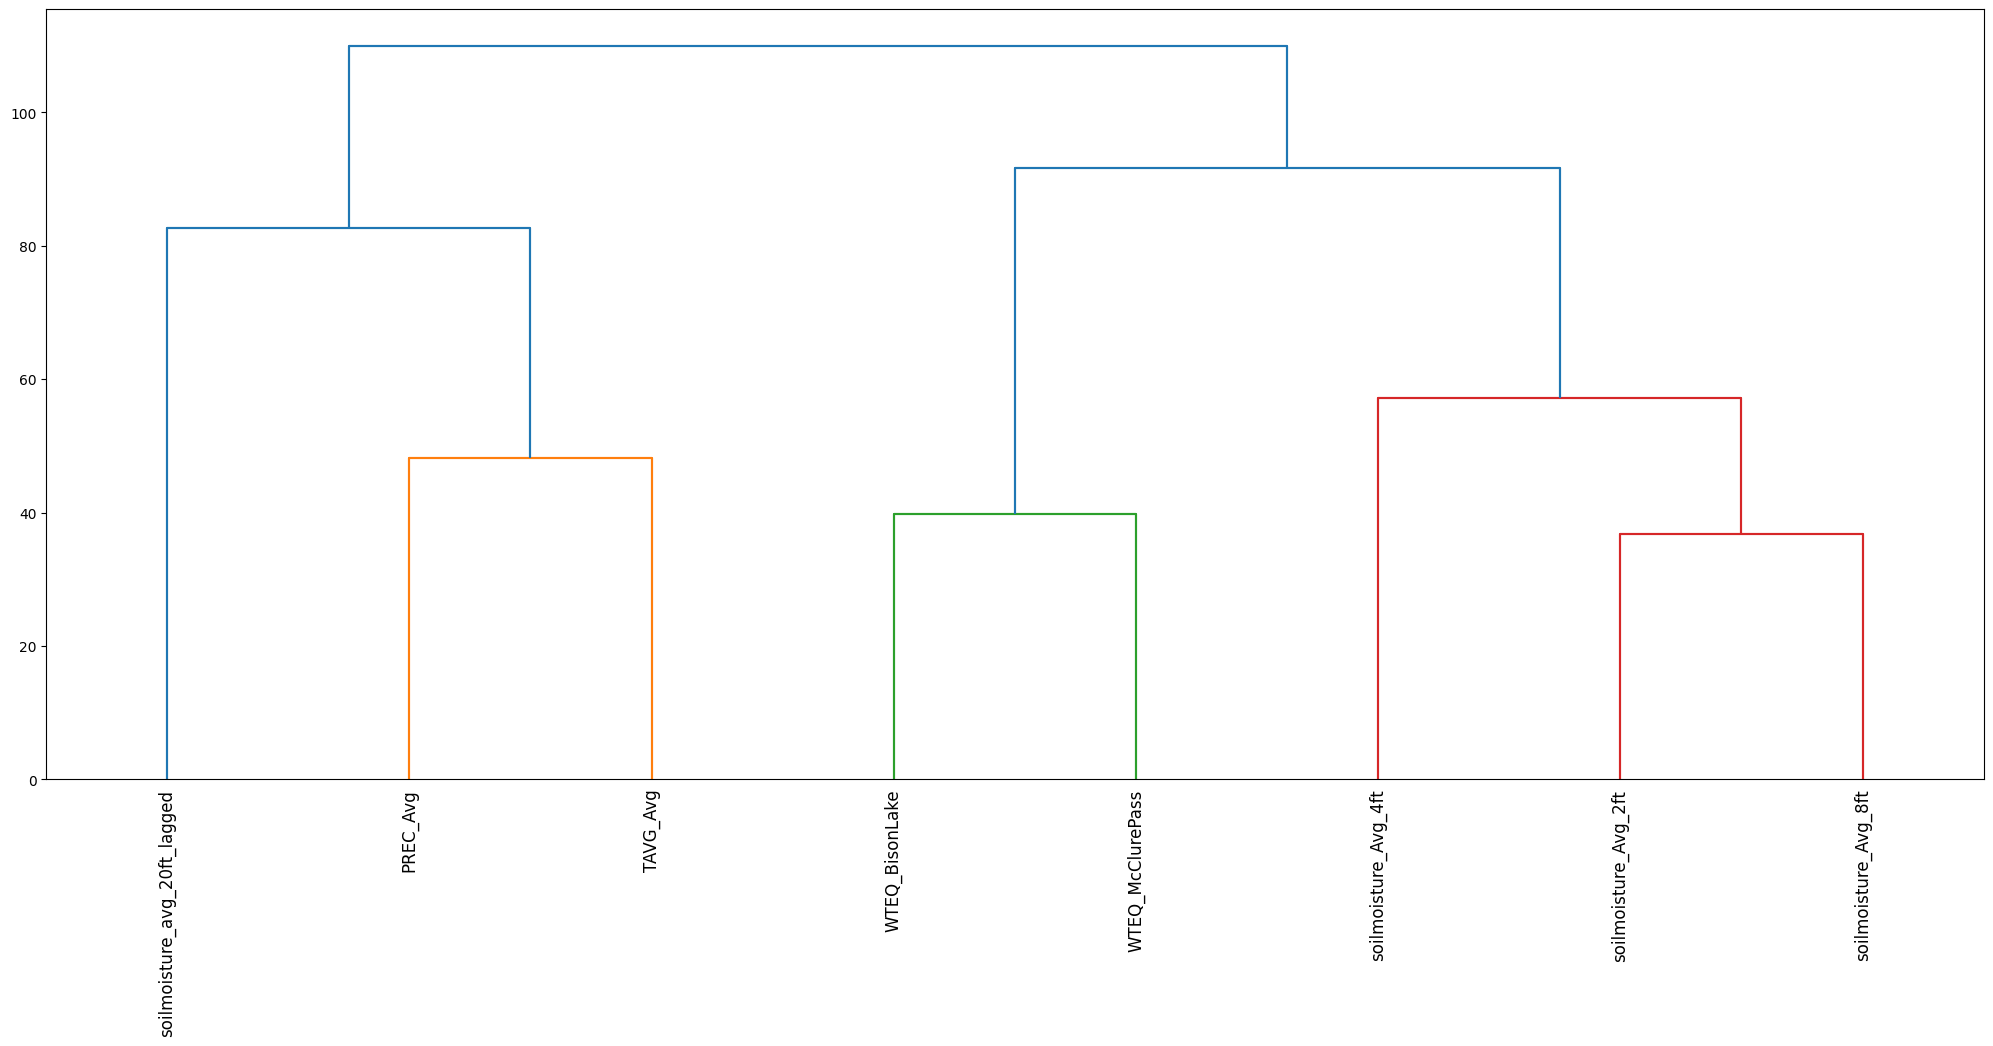

In [35]:
df = df_raw.copy()

df['soilmoisture_avg_20ft_lagged'] = df['soilmoisture_Avg_20ft'].shift(7)

df = df.dropna()
df = df.drop(columns=['soilmoisture_Avg_20ft'])
display(df)

df_adj_scaled = scaler.fit_transform(df)
display(df_adj_scaled)

Z = linkage(df_adj_scaled.T, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
dn = dendrogram(Z, labels=df.columns, leaf_rotation=90)
plt.show()

### Dendrogram Conclusions
Interestingly, after lagging the soil moisture - 20ft depth variable by 7 days, the results look a lot more intuitive. Soil moisture at 20ft depth and lagged by 7 days is now more closely aligned to precipitation and average temperature. Snow water equivalent for two stations are clustered together, and the rest of the soil moisture variables (2-8ft) are clustered together. This serves as a good validation of the data, and helps to inform our feature engineering in later modeling steps.